In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

from utils.make_spectrogram import generate_mel_spectrogram

from pydub import AudioSegment
from pydub.utils import mediainfo
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from audiomentations import SpecCompose, SpecChannelShuffle, SpecFrequencyMask

from utils.augment_audio import AugmentData

In [37]:
data_path_2c = "/Data/soundsolution/records/barnacle+goose.json/XC497551-19082019_brleu_call_1.mp3"
data_path_1c = "/Data/soundsolution/records/barn+swallow.json/XC663190-dymówka  Wroceń 15.07.2021   5.45.mp3"

audio = AudioSegment.from_mp3(data_path_1c)
arr = np.array(audio.get_array_of_samples(), dtype=float)
info =  mediainfo(data_path_1c)
sr = int(info["sample_rate"])
n_channels = info["channels"]

In [29]:
audio.channels

1

In [33]:
import pydub
pydub.utils.ms_to_stereo(audio)

IndexError: list index out of range

In [35]:
audio.set_channels(2)

In [9]:
d = AugmentData(data_path=data_path).main()

In [15]:
n_channels

'1'

In [8]:
next(iter(d))[0].shape

(128, 282)

/usr/local/lib/python3.8/site-packages/audiomentations/core/transforms_interface.py:57: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


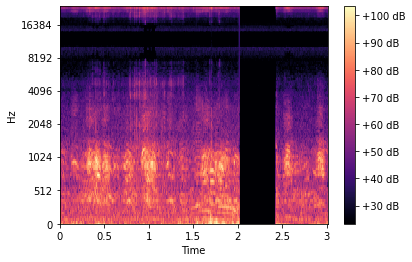

In [8]:
mel_sgram = next(iter(AugmentData(data_path).main()))

info = mediainfo(data_path)
sr = int(info["sample_rate"])

librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')